<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r10-unbalaced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-3-r10.csv?token=AKVFSOF233K3NSNUKJI2TA26ZOPVQ')
print(df.shape)
df

(31858, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,142,2,4,4,1,1,5,17,24,8,3,3,3,5,2,0.40,12,5,1,5,5,25,8,4,4,12,20,85,100,1
1,143,2,4,4,2,2,5,17,24,8,3,3,3,5,2,0.40,13,4,2,5,8,40,8,8,16,48,20,85,100,1
2,144,2,4,4,3,2,5,17,24,8,3,3,3,5,2,0.40,14,3,3,5,9,45,8,12,24,72,20,85,100,1
3,145,2,4,4,4,2,5,17,24,8,3,3,3,5,2,0.40,15,2,4,5,8,40,8,16,32,96,20,85,100,1
4,149,2,4,4,5,3,5,17,24,8,3,3,3,5,2,0.40,19,1,5,5,5,25,8,20,60,180,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31853,3268217,1,3,5,3,2,3,9,3,3,30,14,20036,4,3,0.75,30,1,1,1,1,1,3,15,30,601080,15,27,45,1
31854,3268224,1,3,5,4,2,3,9,3,3,30,14,20036,4,3,0.75,37,1,1,1,1,1,3,20,40,801440,15,27,45,1
31855,3268231,1,3,5,5,3,3,9,3,3,30,14,20036,4,3,0.75,44,1,1,1,1,1,3,25,75,1502700,15,27,45,1
31856,3268232,1,3,1,1,4,3,10,3,3,30,14,20037,4,3,0.75,44,1,1,1,1,1,3,1,4,80148,3,30,9,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-1-r10.csv?token=AKVFSOBNEVWOUVX2XQ2T6X26ZOPVW')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-6-r10.csv?token=AKVFSOH5H5ZTLFF4N6FK7OS6ZOPV2')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-9-r10.csv?token=AKVFSOHLVL6UV7M3ZRLNUG26ZOPV6')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-14-r10.csv?token=AKVFSOACNV5R4ZP33A6R2KC6ZOPWC')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-5-r10.csv?token=AKVFSOAX5PJRHTTKT5TVNYS6ZOTIQ')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-12-r10.csv?token=AKVFSODDR7A4W267M6OADMS6ZOTIS')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-15-r10.csv?token=AKVFSOCOEGOQ3G3SZNJXL4S6ZOTIW')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(48099, 30)
(56021, 30)
(60201, 30)
(73268, 30)
(31527, 30)
(33360, 30)
(33710, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,9,9,23,7,3,3,1,0.333333,8,1,1,1,1,1,8,1,4,12,3,27,9,0
1,80,1,3,4,1,1,5,17,23,7,14,14,3,3,2,0.666667,12,5,1,5,5,25,3,4,4,12,20,85,100,0
2,81,1,3,4,2,2,5,17,23,7,14,14,3,3,2,0.666667,13,4,2,5,8,40,3,8,16,48,20,85,100,0
3,82,1,3,4,3,2,5,17,23,7,14,14,3,3,2,0.666667,14,3,3,5,9,45,3,12,24,72,20,85,100,0
4,83,1,3,4,4,2,5,17,23,7,14,14,3,3,2,0.666667,15,2,4,5,8,40,3,16,32,96,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368039,3275767,2,4,4,1,1,5,17,24,8,15,15,20062,4,2,0.500000,13,1,1,1,1,1,8,4,4,80248,20,85,100,1
368040,3275768,2,4,4,2,2,5,17,24,8,15,15,20062,4,2,0.500000,14,1,1,1,1,1,8,8,16,320992,20,85,100,1
368041,3275769,2,4,4,3,2,5,17,24,8,15,15,20062,4,2,0.500000,15,1,1,1,1,1,8,12,24,481488,20,85,100,1
368042,3275770,2,4,4,4,2,5,17,24,8,15,15,20062,4,2,0.500000,16,1,1,1,1,1,8,16,32,641984,20,85,100,1


In [0]:
df.shape

(368044, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-2-r10.csv?token=AKVFSOHXRQUKNODXMQ2MDO26ZOTZE')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-5-r10.csv?token=AKVFSOACPS3DG4RTHWYF23C6ZOTZI')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-10-r10.csv?token=AKVFSOCRLZZ2OB47EE76YN26ZOTZM')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-12-r10.csv?token=AKVFSOEGP6PIQZLSLNFLLK26ZOTZQ')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-13-r10.csv?token=AKVFSODCYQQL4BP47TLXQQ26ZOTZU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-malicious-n-0-3-m-15-r10.csv?token=AKVFSOG5KH4CIZ5YMB3HOFS6ZOTZW')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r10/2-fft-normal-n-0-10-r10.csv?token=AKVFSOHHKN7DAMOCBVTEIPS6ZOT6U')
df5.shape

(56021, 30)

In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,142,2,4,4,1,1,5,17,24,8,3,3,4,5,2,0.40,12,10,1,10,10,100,8,4,4,16,20,85,100,0
1,143,2,4,4,2,2,5,17,24,8,3,3,4,5,2,0.40,13,9,2,10,18,180,8,8,16,64,20,85,100,0
2,144,2,4,4,3,2,5,17,24,8,3,3,4,5,2,0.40,14,8,3,10,24,240,8,12,24,96,20,85,100,0
3,145,2,4,4,4,2,5,17,24,8,3,3,4,5,2,0.40,15,7,4,10,28,280,8,16,32,128,20,85,100,0
4,149,2,4,4,5,3,5,17,24,8,3,3,4,5,2,0.40,19,6,5,10,30,300,8,20,60,240,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56016,3269738,1,3,5,3,2,3,9,3,3,30,14,30059,4,3,0.75,30,4,2,5,8,40,3,15,30,901770,15,27,45,0
56017,3269745,1,3,5,4,2,3,9,3,3,30,14,30059,4,3,0.75,37,3,3,5,9,45,3,20,40,1202360,15,27,45,0
56018,3269752,1,3,5,5,3,3,9,3,3,30,14,30059,4,3,0.75,44,2,4,5,8,40,3,25,75,2254425,15,27,45,0
56019,3269753,1,3,1,1,4,3,10,3,3,30,14,30060,4,3,0.75,44,1,5,5,5,25,3,1,4,120240,3,30,9,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.564617,0.166887,0.042823,-0.064467,0.169672,0.217492,-0.003311,0.049151,-0.742803,-0.866265,-0.352886,-0.081354,-0.004737,-0.053535,-0.032167,-0.027152,0.486838,0.091032,0.071043,0.048311,0.276101,0.189664,0.240163,0.129830
inport,-0.564617,1.000000,-0.277078,0.015924,-0.023973,0.265218,0.184432,0.036139,0.363673,0.591151,0.577747,0.056088,-0.002233,-0.035612,-0.023533,-0.047686,-0.053937,0.387591,-0.115183,-0.100276,-0.052056,-0.016235,0.233474,0.162321,-0.163853
cache_coherence_type,0.166887,-0.277078,1.000000,0.221712,-0.333770,-0.257504,-0.251306,0.035240,-0.124137,-0.181911,-0.213575,-0.154123,0.049048,-0.005173,0.027283,0.031028,0.032771,-0.123327,0.469908,0.388550,0.290799,0.624272,-0.255936,0.131947,-0.000689
flit_id,0.042823,0.015924,0.221712,1.000000,-0.033398,0.236510,0.218987,0.002946,0.103689,0.029683,-0.026241,0.357214,-0.039045,0.076205,0.023108,0.021838,0.013192,0.069319,0.942384,0.897289,0.636029,0.375776,0.230281,0.330445,-0.006953
flit_type,-0.064467,-0.023973,-0.333770,-0.033398,1.000000,-0.356047,-0.329668,-0.004435,-0.156095,-0.044685,0.039503,0.298558,-0.072036,0.079803,0.004829,-0.008264,-0.002622,-0.104355,-0.087799,0.184637,0.133217,-0.565702,-0.346671,-0.497460,0.010467
vnet,0.169672,0.265218,-0.257504,0.236510,-0.356047,1.000000,0.984832,-0.005433,0.454961,-0.047850,-0.163047,-0.444111,-0.054505,0.007035,-0.029518,-0.038326,-0.049371,0.492716,0.020491,-0.030499,-0.028655,0.594110,0.997515,0.923852,-0.050586
vc,0.217492,0.184432,-0.251306,0.218987,-0.329668,0.984832,1.000000,-0.005334,0.420459,-0.113130,-0.235906,-0.441810,-0.050642,0.030077,-0.012788,-0.020524,-0.032910,0.447299,0.010833,-0.034269,-0.031735,0.587006,0.994600,0.910747,-0.047311
traversal_id,-0.003311,0.036139,0.035240,0.002946,-0.004435,-0.005433,-0.005334,1.000000,-0.040870,-0.024263,-0.000753,-0.000841,0.056569,0.056606,0.070376,0.046449,0.025523,0.028742,0.012658,0.011775,0.554231,0.024943,-0.005388,0.008385,-0.287301
hop_count,0.049151,0.363673,-0.124137,0.103689,-0.156095,0.454961,0.420459,-0.040870,1.000000,0.411226,-0.026428,-0.039431,-0.104622,-0.077051,-0.112970,-0.102522,-0.091724,0.453263,-0.016134,-0.027490,-0.045172,0.264484,0.442616,0.417550,0.120185
current_hop,-0.742803,0.591151,-0.181911,0.029683,-0.044685,-0.047850,-0.113130,-0.024263,0.411226,1.000000,0.840644,0.453232,0.005903,-0.074960,-0.042942,-0.046535,-0.039705,-0.163325,-0.039747,-0.048200,-0.048576,-0.190118,-0.074466,-0.121143,0.004213


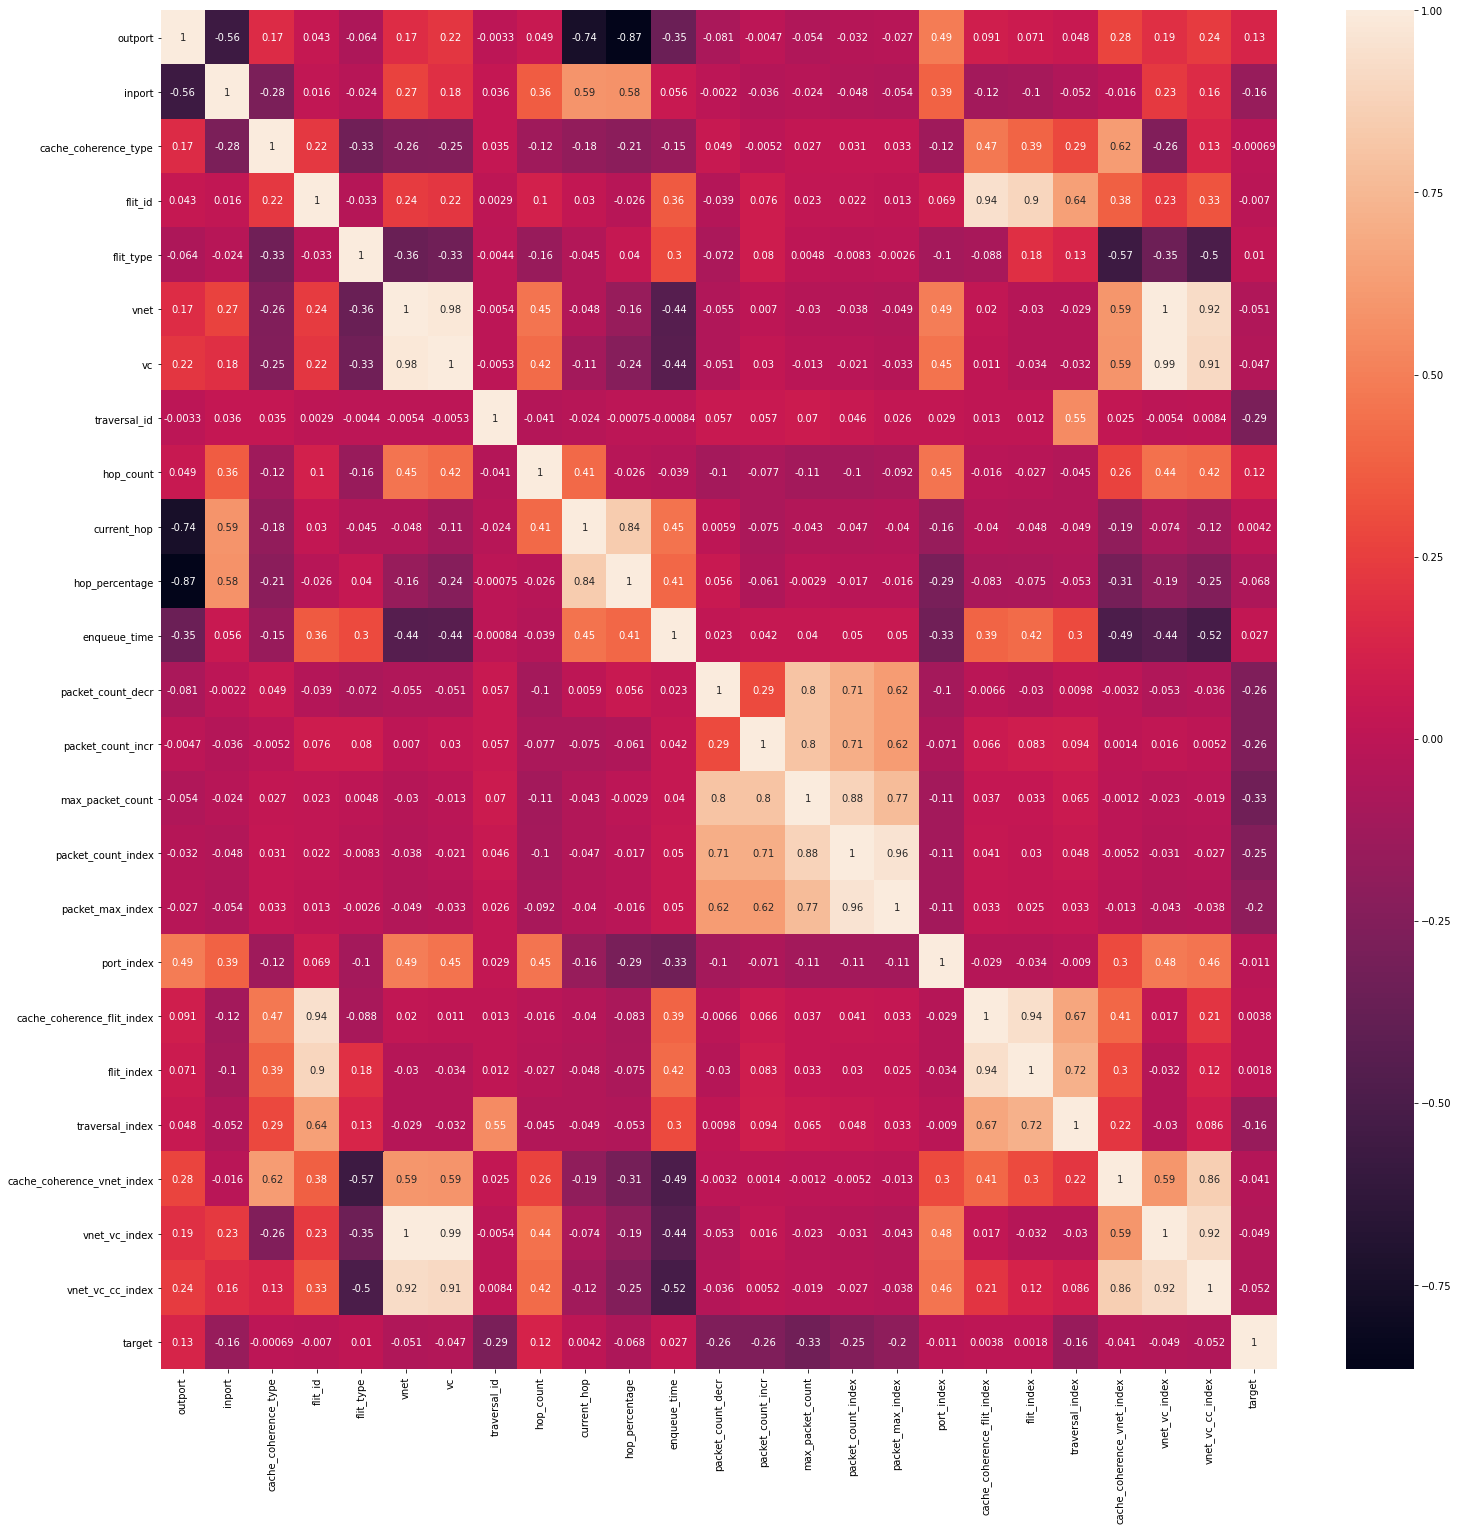

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,4,1,1,4,3,9,3,3,1,0.333333,8,1,1,1,1,1,8,1,4,12,3,27,9
1,1,3,4,1,1,5,17,3,3,2,0.666667,12,5,1,5,5,25,3,4,4,12,20,85,100
2,1,3,4,2,2,5,17,3,3,2,0.666667,13,4,2,5,8,40,3,8,16,48,20,85,100
3,1,3,4,3,2,5,17,3,3,2,0.666667,14,3,3,5,9,45,3,12,24,72,20,85,100
4,1,3,4,4,2,5,17,3,3,2,0.666667,15,2,4,5,8,40,3,16,32,96,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368039,2,4,4,1,1,5,17,20062,4,2,0.500000,13,1,1,1,1,1,8,4,4,80248,20,85,100
368040,2,4,4,2,2,5,17,20062,4,2,0.500000,14,1,1,1,1,1,8,8,16,320992,20,85,100
368041,2,4,4,3,2,5,17,20062,4,2,0.500000,15,1,1,1,1,1,8,12,24,481488,20,85,100
368042,2,4,4,4,2,5,17,20062,4,2,0.500000,16,1,1,1,1,1,8,16,32,641984,20,85,100


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.25,0.333333,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.25,0.75,0.5,0.00,0.000000,1.0,0.888889,0.000000,0.50,0.50,0.666667,0.126984,0.114286,0.000000,0.114286,0.011730,0.001949,0.250000,0.103448,0.000000,0.000000,0.944444,0.920635,1.0
2,0.25,0.75,0.5,0.25,0.333333,1.0,0.888889,0.000000,0.50,0.50,0.666667,0.142857,0.085714,0.028571,0.114286,0.020528,0.003168,0.250000,0.241379,0.139535,0.000013,0.944444,0.920635,1.0
3,0.25,0.75,0.5,0.50,0.333333,1.0,0.888889,0.000000,0.50,0.50,0.666667,0.158730,0.057143,0.057143,0.114286,0.023460,0.003574,0.250000,0.379310,0.232558,0.000022,0.944444,0.920635,1.0
4,0.25,0.75,0.5,0.75,0.333333,1.0,0.888889,0.000000,0.50,0.50,0.666667,0.174603,0.028571,0.085714,0.114286,0.020528,0.003168,0.250000,0.517241,0.325581,0.000031,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368039,0.50,1.00,0.5,0.00,0.000000,1.0,0.888889,0.666633,0.75,0.50,0.500000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.029626,0.944444,0.920635,1.0
368040,0.50,1.00,0.5,0.25,0.333333,1.0,0.888889,0.666633,0.75,0.50,0.500000,0.158730,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.118519,0.944444,0.920635,1.0
368041,0.50,1.00,0.5,0.50,0.333333,1.0,0.888889,0.666633,0.75,0.50,0.500000,0.174603,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.177780,0.944444,0.920635,1.0
368042,0.50,1.00,0.5,0.75,0.333333,1.0,0.888889,0.666633,0.75,0.50,0.500000,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.237042,0.944444,0.920635,1.0


In [0]:
train_X[train_X.duplicated()].shape

(9814, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.140351,0.290323,0.000000,0.290323,0.033210,0.011375,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.157895,0.258065,0.032258,0.290323,0.062731,0.020568,0.666667,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.175439,0.225806,0.064516,0.290323,0.084871,0.027462,0.666667,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.192982,0.193548,0.096774,0.290323,0.099631,0.032058,0.666667,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.263158,0.161290,0.129032,0.290323,0.107011,0.034356,0.666667,0.655172,0.651163,0.000083,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56016,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.456140,0.096774,0.032258,0.129032,0.025830,0.004481,0.250000,0.482759,0.302326,0.333374,0.666667,0.000000,0.395604
56017,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.578947,0.064516,0.064516,0.129032,0.029520,0.005056,0.250000,0.655172,0.418605,0.444500,0.666667,0.000000,0.395604
56018,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.701754,0.032258,0.096774,0.129032,0.025830,0.004481,0.250000,0.827586,0.825581,0.833443,0.666667,0.000000,0.395604
56019,0.25,0.75,0.000000,0.00,1.000000,0.0,0.111111,1.000000,0.666667,0.75,0.75,0.701754,0.000000,0.129032,0.129032,0.014760,0.002758,0.250000,0.000000,0.000000,0.044446,0.000000,0.047619,0.000000


In [0]:
test_X[test_X.duplicated()].shape

(36, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(23, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.129032,0.111111,0.000000,0.111111,0.011111,0.001797,1.000,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.145161,0.083333,0.027778,0.111111,0.019444,0.002920,1.000,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.161290,0.055556,0.055556,0.111111,0.022222,0.003294,1.000,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.177419,0.027778,0.083333,0.111111,0.019444,0.002920,1.000,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.241935,0.000000,0.111111,0.111111,0.011111,0.001797,1.000,0.655172,0.651163,0.000083,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47782,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.419355,0.083333,0.000000,0.083333,0.008333,0.001123,0.375,0.482759,0.302326,0.333374,0.666667,0.000000,0.395604
47783,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.532258,0.055556,0.027778,0.083333,0.013889,0.001722,0.375,0.655172,0.418605,0.444500,0.666667,0.000000,0.395604
47784,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.645161,0.027778,0.055556,0.083333,0.013889,0.001722,0.375,0.827586,0.825581,0.833443,0.666667,0.000000,0.395604
47785,0.25,0.75,0.000000,0.00,1.000000,0.0,0.111111,1.000000,0.666667,0.75,0.75,0.645161,0.000000,0.083333,0.083333,0.008333,0.001123,0.375,0.000000,0.000000,0.044446,0.000000,0.047619,0.000000


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(42, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.4,0.00,0.000000,0.000000,0.147059,0.000000,0.147059,0.015480,0.003087,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.75,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.4,0.50,1.000000,0.133333,0.117647,0.029412,0.147059,0.027864,0.005203,0.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
2,0.0,0.75,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.4,0.50,1.000000,0.150000,0.088235,0.058824,0.147059,0.034056,0.006262,0.0,0.241379,0.139535,0.000013,0.944444,0.920635,1.000000
3,0.0,0.75,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.4,0.50,1.000000,0.166667,0.058824,0.088235,0.147059,0.034056,0.006262,0.0,0.379310,0.232558,0.000022,0.944444,0.920635,1.000000
4,0.0,0.75,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.4,0.50,1.000000,0.183333,0.029412,0.117647,0.147059,0.027864,0.005203,0.0,0.517241,0.325581,0.000031,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99282,1.0,0.50,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.6,0.25,0.333333,0.183333,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266663,0.833333,0.000000,0.494505
99283,1.0,0.50,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.6,0.25,0.333333,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.399997,0.833333,0.000000,0.494505
99284,1.0,0.50,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.6,0.25,0.333333,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.533331,0.833333,0.000000,0.494505
99285,1.0,0.50,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.6,0.25,0.333333,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(24, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.140351,0.133333,0.000000,0.133333,0.015686,0.003025,1.000,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.157895,0.100000,0.033333,0.133333,0.027451,0.004915,1.000,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.175439,0.066667,0.066667,0.133333,0.031373,0.005545,1.000,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.192982,0.033333,0.100000,0.133333,0.027451,0.004915,1.000,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.000000,0.50,0.40,0.263158,0.000000,0.133333,0.133333,0.015686,0.003025,1.000,0.655172,0.651163,0.000083,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49938,0.75,0.25,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.333333,0.133333,0.033333,0.166667,0.035294,0.007435,0.375,0.310345,0.186047,0.222306,0.666667,0.000000,0.395604
49939,0.75,0.25,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.456140,0.100000,0.066667,0.166667,0.043137,0.008948,0.375,0.482759,0.302326,0.333463,0.666667,0.000000,0.395604
49940,0.75,0.25,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.578947,0.066667,0.100000,0.166667,0.043137,0.008948,0.375,0.655172,0.418605,0.444619,0.666667,0.000000,0.395604
49941,0.75,0.25,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.666667,0.75,0.75,0.701754,0.033333,0.133333,0.166667,0.035294,0.007435,0.375,0.827586,0.825581,0.833665,0.666667,0.000000,0.395604


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(24, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.500000,0.00,0.000000,1.0,0.888889,0.0,1.000000,0.5,0.400000,0.112676,0.117647,0.000000,0.117647,0.012384,0.002117,1.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,0.0,1.000000,0.5,0.400000,0.126761,0.088235,0.029412,0.117647,0.021672,0.003439,1.0,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
2,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,0.0,1.000000,0.5,0.400000,0.140845,0.058824,0.058824,0.117647,0.024768,0.003880,1.0,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
3,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,0.0,1.000000,0.5,0.400000,0.154930,0.029412,0.088235,0.117647,0.021672,0.003439,1.0,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
4,0.5,1.0,0.500000,1.00,0.666667,1.0,0.888889,0.0,1.000000,0.5,0.400000,0.211268,0.000000,0.117647,0.117647,0.012384,0.002117,1.0,0.655172,0.651163,0.000083,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49938,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,1.0,1.000000,0.5,0.400000,0.126761,0.117647,0.088235,0.205882,0.058824,0.014022,1.0,0.241379,0.139535,0.177785,0.944444,0.920635,1.000000
49939,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,1.0,1.000000,0.5,0.400000,0.140845,0.088235,0.117647,0.205882,0.058824,0.014022,1.0,0.379310,0.232558,0.266680,0.944444,0.920635,1.000000
49940,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,1.0,1.000000,0.5,0.400000,0.154930,0.058824,0.147059,0.205882,0.052632,0.012611,1.0,0.517241,0.325581,0.355575,0.944444,0.920635,1.000000
49941,0.5,1.0,0.333333,0.00,1.000000,0.0,0.000000,1.0,0.333333,0.5,0.666667,0.169014,0.029412,0.176471,0.205882,0.040248,0.009789,1.0,0.068966,0.093023,0.133337,0.333333,0.000000,0.197802


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(47, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,1.000000,0.5,0.400000,0.133333,0.300000,0.000000,0.300000,0.035294,0.012476,1.000,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,1.000000,0.5,0.400000,0.150000,0.266667,0.033333,0.300000,0.066667,0.022558,1.000,0.241379,0.139535,0.000018,0.944444,0.920635,1.000000
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,1.000000,0.5,0.400000,0.166667,0.233333,0.066667,0.300000,0.090196,0.030120,1.000,0.379310,0.232558,0.000030,0.944444,0.920635,1.000000
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,1.000000,0.5,0.400000,0.183333,0.200000,0.100000,0.300000,0.105882,0.035161,1.000,0.517241,0.325581,0.000041,0.944444,0.920635,1.000000
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,1.000000,0.5,0.400000,0.250000,0.166667,0.133333,0.300000,0.113725,0.037681,1.000,0.655172,0.651163,0.000083,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50274,0.75,0.25,0.000000,0.00,1.000000,0.0,0.111111,0.999967,0.666667,0.5,0.500000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.000000,0.000000,0.044455,0.000000,0.047619,0.000000
50275,0.75,0.25,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.333333,0.5,0.666667,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.137931,0.011628,0.055572,0.666667,0.000000,0.395604
50276,0.75,0.25,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.333333,0.5,0.666667,0.250000,0.066667,0.000000,0.066667,0.007843,0.001008,0.375,0.310345,0.186047,0.222306,0.666667,0.000000,0.395604
50277,0.75,0.25,0.666667,0.50,0.333333,0.0,0.000000,1.000000,0.333333,0.5,0.666667,0.366667,0.033333,0.033333,0.066667,0.011765,0.001386,0.375,0.482759,0.302326,0.333462,0.666667,0.000000,0.395604


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(50, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.4,0.00,0.000000,0.000000,0.24,0.00,0.24,0.033149,0.010146,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.75,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.4,0.50,1.000000,0.135593,0.20,0.04,0.24,0.060773,0.017544,0.0,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
2,0.0,0.75,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.4,0.50,1.000000,0.152542,0.16,0.08,0.24,0.077348,0.021983,0.0,0.241379,0.139535,0.000013,0.944444,0.920635,1.000000
3,0.0,0.75,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.4,0.50,1.000000,0.169492,0.12,0.12,0.24,0.082873,0.023462,0.0,0.379310,0.232558,0.000022,0.944444,0.920635,1.000000
4,0.0,0.75,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.4,0.50,1.000000,0.186441,0.08,0.16,0.24,0.077348,0.021983,0.0,0.517241,0.325581,0.000031,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83451,1.0,0.50,0.500000,1.00,0.666667,1.0,0.888889,0.999551,1.0,0.25,0.200000,0.186441,0.00,0.20,0.20,0.027624,0.007398,1.0,0.655172,0.651163,0.666831,0.944444,0.920635,1.000000
83452,1.0,0.50,0.833333,0.00,0.000000,0.0,0.000000,1.000000,0.6,0.25,0.333333,0.067797,0.00,0.00,0.00,0.000000,0.000000,1.0,0.172414,0.023256,0.066709,0.833333,0.000000,0.494505
83453,1.0,0.50,0.833333,0.25,0.333333,0.0,0.000000,1.000000,0.6,0.25,0.333333,0.186441,0.00,0.00,0.00,0.000000,0.000000,1.0,0.379310,0.232558,0.266850,0.833333,0.000000,0.494505
83454,1.0,0.50,0.833333,0.50,0.333333,0.0,0.000000,1.000000,0.6,0.25,0.333333,0.305085,0.00,0.00,0.00,0.000000,0.000000,1.0,0.586207,0.372093,0.400277,0.833333,0.000000,0.494505


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    237589
1    130455
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  8030.248798
7                 traversal_id  4129.384422
13           packet_count_incr  4016.501502
12           packet_count_decr  4013.748987
15          packet_count_index  2666.926168
1                       inport  1289.482039
16            packet_max_index  1284.518663
20             traversal_index  1251.664206
0                      outport  1128.879992
8                    hop_count   580.519162
5                         vnet   459.322329
22               vnet_vc_index   372.961696
6                           vc   298.946433
10              hop_percentage   287.286560
23            vnet_vc_cc_index   149.021764
21  cache_coherence_vnet_index    50.385560
11                enqueue_time    30.376936


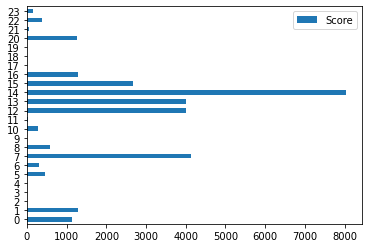

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 73.188309813711
Test Prediction  72.91227974840034


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  86.69427536102533


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  86.98390775733986


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  85.91960679645875


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  80.46773321586609


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  81.57499549486414


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  83.19775651862606


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  16.43860237730061


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
16,packet_max_index,6.613763
18,cache_coherence_flit_index,3.655218
10,hop_percentage,2.673115
8,hop_count,2.604444
15,packet_count_index,1.875512
0,outport,1.675415
6,vc,0.823541
22,vnet_vc_index,0.105590
4,flit_type,-0.021719
19,flit_index,-0.030553


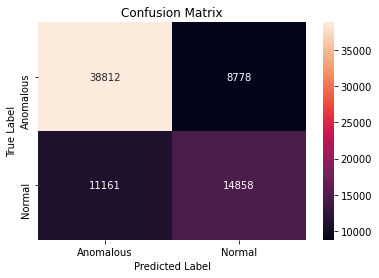

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     47590
           1       0.63      0.57      0.60     26019

    accuracy                           0.73     73609
   macro avg       0.70      0.69      0.70     73609
weighted avg       0.72      0.73      0.73     73609



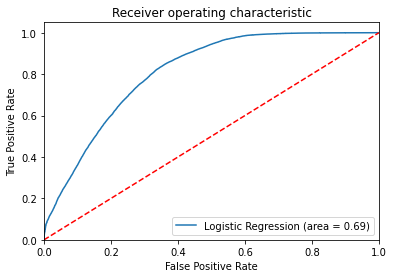

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

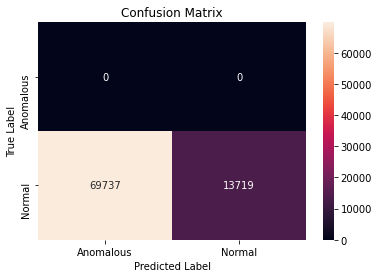

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.16      0.28     83456

    accuracy                           0.16     83456
   macro avg       0.50      0.08      0.14     83456
weighted avg       1.00      0.16      0.28     83456



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 89.04953555114032
Test Prediction  83.12842179624774


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  83.73110083718606


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  64.4798794651265


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  91.85996152567807


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  66.53184630478745


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  66.57389423943295


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  68.81202887885598


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  9.77880559815951


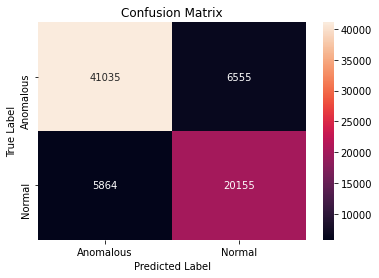

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     47590
           1       0.75      0.77      0.76     26019

    accuracy                           0.83     73609
   macro avg       0.81      0.82      0.82     73609
weighted avg       0.83      0.83      0.83     73609



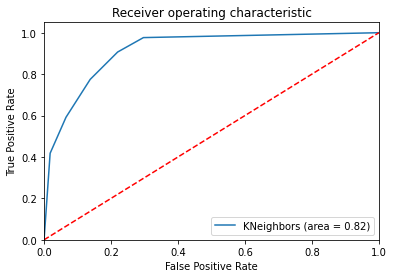

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

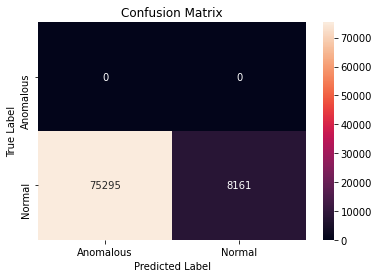

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.10      0.18     83456

    accuracy                           0.10     83456
   macro avg       0.50      0.05      0.09     83456
weighted avg       1.00      0.10      0.18     83456



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 60.789647969840544
Test Prediction Score 60.575473107907996


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 43.75859052855179


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  31.72620168665118


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  62.267970630596146


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  36.409506837795085


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  35.10201629858038


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  37.737425167564986


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  34.62543136503067


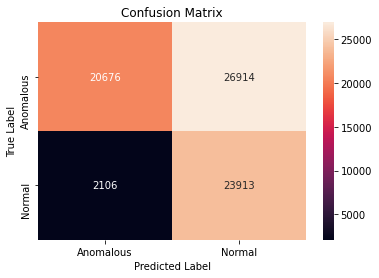

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.43      0.59     47590
           1       0.47      0.92      0.62     26019

    accuracy                           0.61     73609
   macro avg       0.69      0.68      0.60     73609
weighted avg       0.75      0.61      0.60     73609



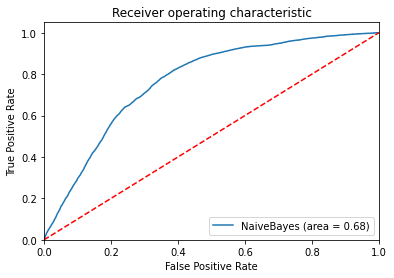

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 235548 samples, validate on 58887 samples
Epoch 1/10
235548/235548 [==============================] - 9s 38us/step - loss: 0.1811 - accuracy: 0.7021 - val_loss: 0.1714 - val_accuracy: 0.7278
Epoch 2/10
235548/235548 [==============================] - 9s 38us/step - loss: 0.1678 - accuracy: 0.7373 - val_loss: 0.1649 - val_accuracy: 0.7470
Epoch 3/10
235548/235548 [==============================] - 9s 38us/step - loss: 0.1631 - accuracy: 0.7490 - val_loss: 0.1629 - val_accuracy: 0.7498
Epoch 4/10
235548/235548 [==============================] - 9s 37us/step - loss: 0.1619 - accuracy: 0.7512 - val_loss: 0.1623 - val_accuracy: 0.7502
Epoch 5/10
235548/235548 [==============================] - 9s 38us/step - loss: 0.1611 - accuracy: 0.7527 - val_loss: 0.1613 - val_accuracy: 0.7531
Epoch 6/10
235548/235548 [==============================] - 9s 38us/step - loss: 0.1606 - accuracy: 0.7535 - val_loss: 0.1611 - val_accuracy: 0.7518
Epoch 7/10
235548/235548 [=============================

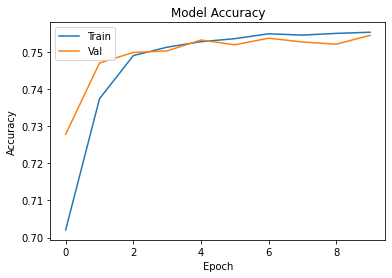

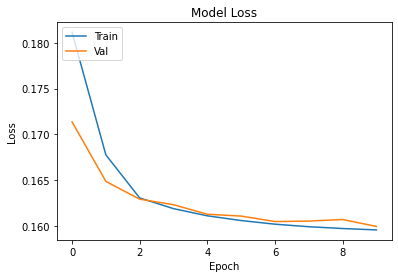

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.23%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.21%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.44%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.63%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.67%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.60%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.33%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 16.94%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 235548 samples, validate on 58887 samples
Epoch 1/30
235548/235548 [==============================] - 9s 39us/step - loss: 0.2069 - accuracy: 0.6525 - val_loss: 0.1833 - val_accuracy: 0.6963
Epoch 2/30
235548/235548 [==============================] - 9s 36us/step - loss: 0.1720 - accuracy: 0.7260 - val_loss: 0.1676 - val_accuracy: 0.7409
Epoch 3/30
235548/235548 [==============================] - 9s 37us/step - loss: 0.1652 - accuracy: 0.7420 - val_loss: 0.1647 - val_accuracy: 0.7434
Epoch 4/30
235548/235548 [==============================] - 9s 37us/step - loss: 0.1636 - accuracy: 0.7450 - val_loss: 0.1638 - val_accuracy: 0.7458
Epoch 5/30
235548/235548 [==============================] - 9s 39us/step - loss: 0.1629 - accuracy: 0.7459 - val_loss: 0.1633 - val_accuracy: 0.7490
Epoch 6/30
235548/235548 [==============================] - 8s 36us/step - loss: 0.1623 - accuracy: 0.7470 - val_loss: 0.1631 - val_accuracy: 0.7454
Epoch 7/30
235548/235548 [=============================

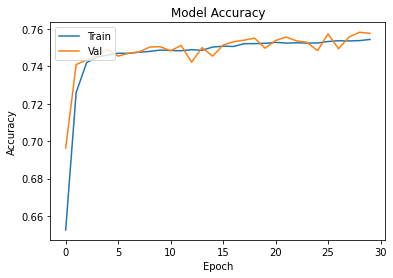

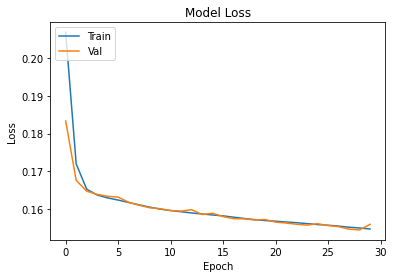

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.31%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 58.61%
accuracy: 54.78%
accuracy: 88.38%
accuracy: 53.19%
accuracy: 48.87%
accuracy: 57.67%
accuracy: 12.07%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 235548 samples, validate on 58887 samples
Epoch 1/30
235548/235548 [==============================] - 9s 36us/step - loss: 0.2104 - accuracy: 0.6702 - val_loss: 0.1813 - val_accuracy: 0.7320
Epoch 2/30
235548/235548 [==============================] - 9s 36us/step - loss: 0.1711 - accuracy: 0.7370 - val_loss: 0.1689 - val_accuracy: 0.7264
Epoch 3/30
235548/235548 [==============================] - 9s 36us/step - loss: 0.1646 - accuracy: 0.7432 - val_loss: 0.1635 - val_accuracy: 0.7472
Epoch 4/30
235548/235548 [==============================] - 9s 37us/step - loss: 0.1620 - accuracy: 0.7455 - val_loss: 0.1614 - val_accuracy: 0.7440
Epoch 5/30
235548/235548 [==============================] - 9s 38us/step - loss: 0.1599 - accuracy: 0.7476 - val_loss: 0.1596 - val_accuracy: 0.7418
Epoch 6/30
235548/235548 [==============================] - 9s 39us/step - loss: 0.1577 - accuracy: 0.7493 - val_loss: 0.1568 - val_accuracy: 0.7546
Epoch 7/30
235548/235548 [=============================

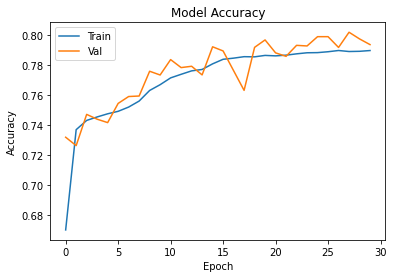

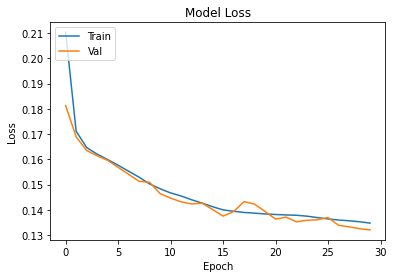

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.15%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.64%
accuracy: 60.81%
accuracy: 90.36%
accuracy: 51.07%
accuracy: 56.36%
accuracy: 55.93%
accuracy: 8.00%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 235548 samples, validate on 58887 samples
Epoch 1/100
235548/235548 [==============================] - 17s 71us/step - loss: 0.1443 - accuracy: 0.7674 - val_loss: 0.1340 - val_accuracy: 0.7862
Epoch 2/100
235548/235548 [==============================] - 16s 67us/step - loss: 0.1320 - accuracy: 0.7898 - val_loss: 0.1219 - val_accuracy: 0.8094
Epoch 3/100
235548/235548 [==============================] - 16s 68us/step - loss: 0.1267 - accuracy: 0.8012 - val_loss: 0.1201 - val_accuracy: 0.8080
Epoch 4/100
235548/235548 [==============================] - 16s 70us/step - loss: 0.1238 - accuracy: 0.8060 - val_loss: 0.1157 - val_accuracy: 0.8207
Epoch 5/100
235548/235548 [==============================] - 17s 71us/step - loss: 0.1221 - accuracy: 0.8088 - val_loss: 0.1176 - val_accuracy: 0.8146
Epoch 6/100
235548/235548 [==============================] - 16s 68us/step - loss: 0.1208 - accuracy: 0.8098 - val_loss: 0.1146 - val_accuracy: 0.8224
Epoch 7/100
235548/235548 [================

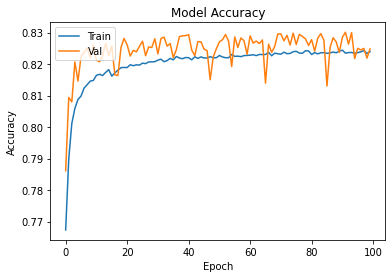

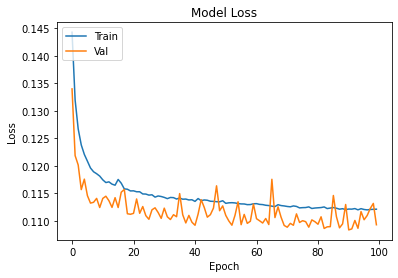

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.38%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.79%
accuracy: 65.68%
accuracy: 96.26%
accuracy: 63.56%
accuracy: 65.23%
accuracy: 60.99%
accuracy: 4.57%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 235548 samples, validate on 58887 samples
Epoch 1/50
235548/235548 [==============================] - 19s 79us/step - loss: 0.1436 - accuracy: 0.7703 - val_loss: 0.1291 - val_accuracy: 0.7963
Epoch 2/50
235548/235548 [==============================] - 18s 75us/step - loss: 0.1315 - accuracy: 0.7897 - val_loss: 0.1212 - val_accuracy: 0.8155
Epoch 3/50
235548/235548 [==============================] - 17s 73us/step - loss: 0.1263 - accuracy: 0.8026 - val_loss: 0.1254 - val_accuracy: 0.7992
Epoch 4/50
235548/235548 [==============================] - 17s 72us/step - loss: 0.1235 - accuracy: 0.8067 - val_loss: 0.1159 - val_accuracy: 0.8208
Epoch 5/50
235548/235548 [==============================] - 17s 71us/step - loss: 0.1219 - accuracy: 0.8093 - val_loss: 0.1149 - val_accuracy: 0.8229
Epoch 6/50
235548/235548 [==============================] - 17s 71us/step - loss: 0.1212 - accuracy: 0.8110 - val_loss: 0.1195 - val_accuracy: 0.8156
Epoch 7/50
235548/235548 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.67%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.90%
accuracy: 68.72%
accuracy: 94.26%
accuracy: 60.88%
accuracy: 65.49%
accuracy: 63.25%
accuracy: 6.46%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 92.38575576952468
Test Prediction Score 89.4034696844136


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 77.63338747969512
Test Prediction Score 65.91541632661603
Test Prediction Score 91.9808232699145
Test Prediction Score 69.91770618505096
Test Prediction Score 67.97148749574515
Test Prediction Score 68.29889218162653
Test Prediction Score 9.765625


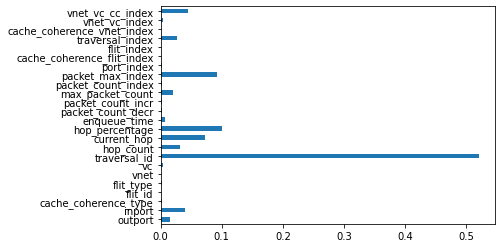

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

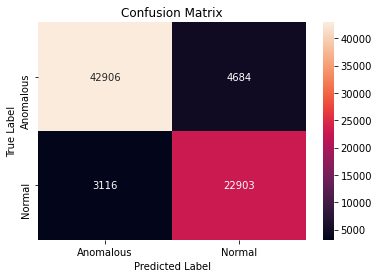

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     47590
           1       0.83      0.88      0.85     26019

    accuracy                           0.89     73609
   macro avg       0.88      0.89      0.89     73609
weighted avg       0.90      0.89      0.89     73609



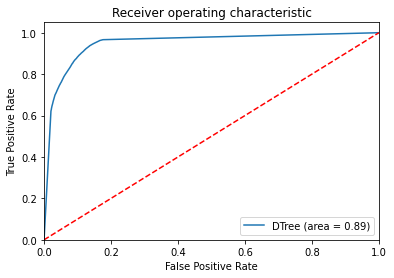

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 94.87560921765416
Test Prediction Score 90.40198888722847


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 78.21174202531193
Test Prediction Score 65.26042647581978
Test Prediction Score 93.26900802723418
Test Prediction Score 69.68944596840399
Test Prediction Score 68.29986184250045
Test Prediction Score 68.20939159490045
Test Prediction Score 8.32534509202454


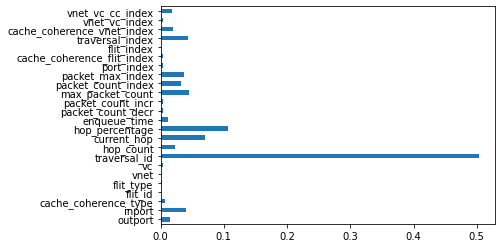

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

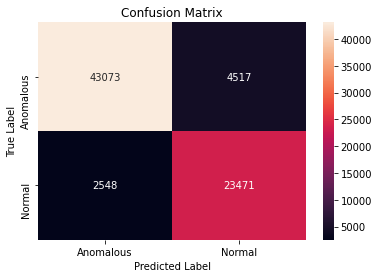

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     47590
           1       0.84      0.90      0.87     26019

    accuracy                           0.90     73609
   macro avg       0.89      0.90      0.90     73609
weighted avg       0.91      0.90      0.90     73609



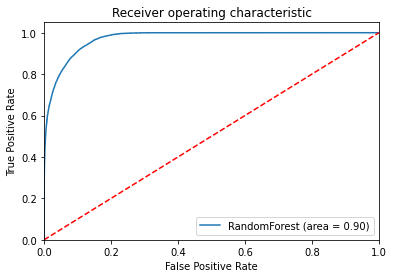

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.7338461799718
Test Prediction Score 93.49400209213547


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 89.7092161867871
Test Prediction Score 92.0794358298282
Test Prediction Score 95.93904539365677
Test Prediction Score 90.23486774923413
Test Prediction Score 91.69853633141781
Test Prediction Score 89.82875554406412
Test Prediction Score 5.242283358895705


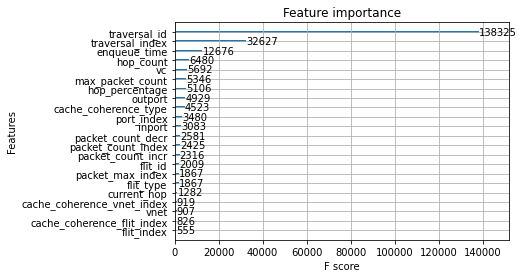

In [0]:
plot_importance(xgbc)
plt.show()

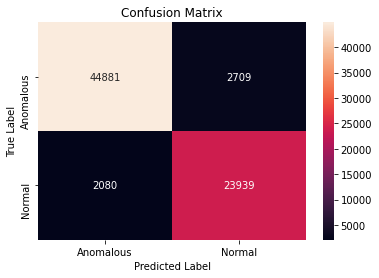

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     47590
           1       0.90      0.92      0.91     26019

    accuracy                           0.93     73609
   macro avg       0.93      0.93      0.93     73609
weighted avg       0.94      0.93      0.94     73609



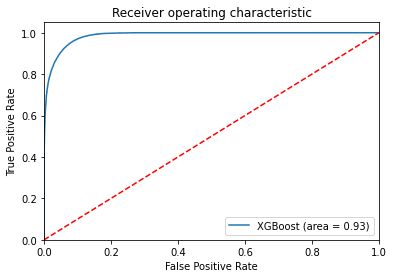

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 86.70232818788527
Test Prediction Score 85.53709464875219


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 89.71100123168098
Test Prediction Score 88.4571117667985
Test Prediction Score 96.64205787263187
Test Prediction Score 90.20883807540596
Test Prediction Score 87.28951004144724
Test Prediction Score 85.45118240219574
Test Prediction Score 4.2765049846625764


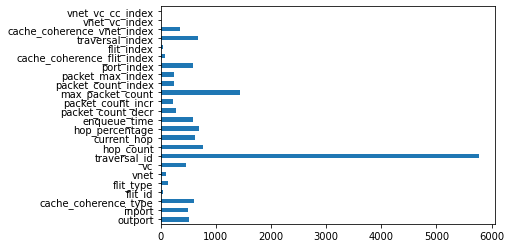

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

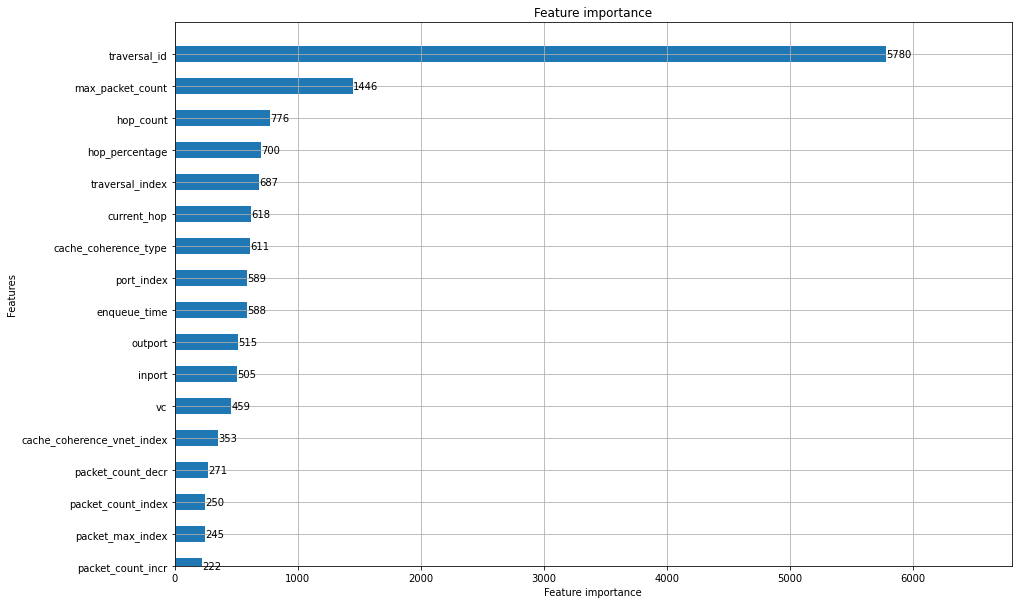

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[5780,
 1446,
 776,
 700,
 687,
 618,
 611,
 589,
 588,
 515,
 505,
 459,
 353,
 271,
 250,
 245,
 222,
 127,
 102,
 74,
 45,
 37,
 0,
 0]

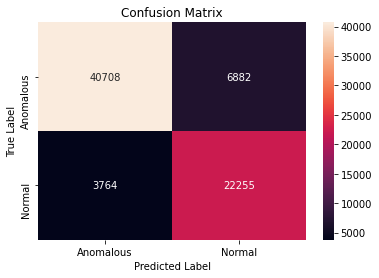

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.92      0.86      0.88     47590
           1       0.76      0.86      0.81     26019

    accuracy                           0.86     73609
   macro avg       0.84      0.86      0.85     73609
weighted avg       0.86      0.86      0.86     73609



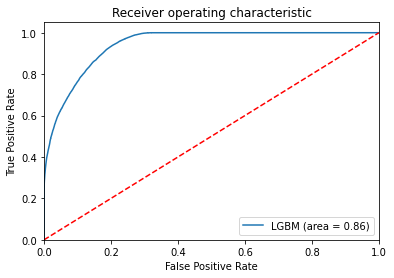

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()